# Games Platforms Analysis

**Project description**

You work for the online store Ice, which sells videogames all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This allows you to put your money on a potentially hot new item and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026. The data set contains the abbreviation ESRB (Entertainment Software Rating Board). The ESRB evaluates a game's content and assigns an appropriate age categories, such as Teen and Mature.

The purpose of the project is to identify patterns that determine whether a game succeeds or not.
My hypothesis is that reviews and game platform all can predict a success of a game.

We will do the following:
1. Sample the data and get a primary information about the data.
2. Examine the data
   1. Missing values, if any.
   2. Examine wrong data types and treat them.
3. Treat missing values. 
4. Explore the data and drive conclusions.
5. Conduct statistical data analysis, visualize the data, and drive conclusions.
6. Hypotheses check.  


Data source:  
/datasets/games.csv

In [1]:
!pip install sidetable

## Opening the data file and studying the general information

In [2]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**Data samples**

In [7]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


## Preparing the data

### Fixing the column names

In [9]:
data.columns=data.columns.str.lower()

In [10]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Checking for missing values

In [11]:
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


There're missing values in following columns:

1. critic_score - about 51% of the data
2. rating - about 40% of the data
3. user_score - about 40% of the data
4. year_of_release - about 2% of the data
5. name and genre - a small % of the data

These missing values must be investigated and addressed. 
As we see from the data, at least part of it must have been manually compiled from different sources. Per project decription, the data is an open source, and therefore, there may have been no monitoring of the data compitaion. Some data has been left out and couldn't be found by those inserting the data in the database. In such case, it's difficult to predict of restore the data. We will try to restore at least some of it.

In [12]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Two rows of the data have missing values in name and genre columns. There's no way to estimate or predict these values, and the amount of data is rather small, therefore, we can safely remove these rows.

### Exploring and fixing issues with data

In [13]:
data[data.user_score=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [14]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
data[data.user_score.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


As we see from the data above, one of the values in user_score column is 'tbd'. We will replace the 'tbd' values in user_score column with NaN, as 'tbd' in this case is similar to missing values. There's no way to estimate or predict user score, therefore, we will leave the NaN values as they are.

In [16]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [17]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

We will change the data type of the user_score column from object to float to be able to make calculations with it later.

In [18]:
data['user_score'] = data['user_score'].astype('float')

**Let's address the missing values in the year_of_release, critic_score, and rating columns.**

In [19]:
data.year_of_release.isna().sum()

269

In [20]:
data.critic_score.isna().sum()

8578

In [21]:
data.rating.isna().sum()

6766

The values for the year_of_release appear on various platforms. We may be able to find the year of release that is missing on one platform, on another platform. For that we will try to restore the missing values using dictionary by finding the most common values for each name of the game for the release year column.

In [22]:
release_year_by_name=data.groupby(['name'])['year_of_release'].apply(lambda x: x.mode()).reset_index()[['name','year_of_release']]
release_year_by_name

,name,year_of_release
0,Beyblade Burst,2016.0
1,Fire Emblem Fates,2015.0
2,Frozen: Olaf's Quest,2013.0
3,Haikyu!! Cross Team Match!,2016.0
4,Tales of Xillia 2,2012.0
...,...,...
11931,thinkSMART FAMILY!,2010.0
11932,thinkSMART: Chess for Kids,2011.0
11933,uDraw Studio,2010.0
11934,uDraw Studio: Instant Artist,2011.0


In [23]:
release_year_dict = dict(zip(release_year_by_name['name'],release_year_by_name['year_of_release']))
release_year_dict

{' Beyblade Burst': 2016.0,
 ' Fire Emblem Fates': 2015.0,
 " Frozen: Olaf's Quest": 2013.0,
 ' Haikyu!! Cross Team Match!': 2016.0,
 ' Tales of Xillia 2': 2012.0,
 "'98 Koshien": 1998.0,
 '.hack//G.U. Vol.1//Rebirth': 2006.0,
 '.hack//G.U. Vol.2//Reminisce': 2006.0,
 '.hack//G.U. Vol.2//Reminisce (jp sales)': 2006.0,
 '.hack//G.U. Vol.3//Redemption': 2007.0,
 '.hack//Infection Part 1': 2002.0,
 '.hack//Link': 2010.0,
 '.hack//Mutation Part 2': 2002.0,
 '.hack//Outbreak Part 3': 2002.0,
 '.hack//Quarantine Part 4: The Final Chapter': 2003.0,
 '.hack: Sekai no Mukou ni + Versus': 2012.0,
 '007 Racing': 2000.0,
 '007: Quantum of Solace': 2008.0,
 '007: The World is not Enough': 2000.0,
 '007: Tomorrow Never Dies': 1999.0,
 '1 vs. 100': 2008.0,
 '1/2 Summer +': 2013.0,
 '10 Minute Solution': 2010.0,
 '100 All-Time Favorites': 2009.0,
 '100 Classic Books': 2008.0,
 '100 Classic Games': 2011.0,
 '1000 Cooking Recipes from ELLE à table': 2010.0,
 '1001 Touch Games': 2011.0,
 '101-in-1 Explos

In [24]:
data['year_of_release']=data['year_of_release'].fillna(data.name.map(release_year_dict))
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [25]:
data.year_of_release.isna().sum()

146

In [26]:
data = data.dropna(subset=['year_of_release'])

In [27]:
data['year_of_release']=data['year_of_release'].astype('int')

In [28]:
data.year_of_release.isna().sum()

0

In [29]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

We will drop the remaining data with missing values in name and year_of_release_columns.

In [30]:
data = data.dropna(subset=['name'])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Summary**

1. We have replaced missing values in the following columns:
- year_of_release

2. Two rows with missing values have been removed from the dataset, where name and platform values were missing.**

3. The missing values have been left as they are if columns:**
- critic_score
- user_score
- rating

4. Replacing missing values in the above columns, even based on value for the same game name on other platforms, will not change a lot and will be a hard stretched estimate. Many missing values will still be left in those columns, therefore, we will leave those as they are, and will filter them out later, once we will need those columns for calculations.

### General sales data to get impression on plaforms and games popularity

In [32]:
data.stb.freq(['platform'],style=True, cum_cols=True)

,platform,count,percent,cumulative_count,cumulative_percent
0,PS2,"2,140",12.92%,"2,140",12.92%
1,DS,"2,129",12.85%,"4,269",25.77%
2,PS3,"1,320",7.97%,"5,589",33.74%
3,Wii,"1,301",7.85%,"6,890",41.59%
4,X360,"1,250",7.55%,"8,140",49.13%
5,PSP,"1,203",7.26%,"9,343",56.40%
6,PS,"1,190",7.18%,"10,533",63.58%
7,PC,970,5.86%,"11,503",69.43%
8,XB,817,4.93%,"12,320",74.36%
9,GBA,813,4.91%,"13,133",79.27%


The most popular platforms with the biggest number of games sales are:
- PS2
- DS
- PS3
- Wii
- X360

In [33]:
data.nlargest(10,['na_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN


In [34]:
data.nlargest(10,['eu_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E


In [35]:
data.nlargest(10,['jp_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN
43,Animal Crossing: Wild World,DS,2005,Simulation,2.50,3.45,5.33,0.86,86.0,8.7,E
26,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN


**Games with largest sales - Top5:**  

NA - Wii Sports, Super Mario Bros., Duck Hunt, Tetris, Mario Karl Wii   
EU - Wii Sports, Mario Karl Wii, Nintendogs, Wii Sports Resort, Brain Age: Train Your Brain in Minutes a Day  
Japan - Pokemon Red/Pokemon Blue, Pokemon Gold/Pokemon Silver, Super Mario Bros., New Super Mario Bros., Pokemon Diamond/Pokemon Pearl

### Total sales for each region for each game

In [36]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Analyzing the data

### Games released in different years

Let's look at how many games were released in different years.

In [37]:
data_games_per_year=data[['year_of_release','name']].groupby(['year_of_release'])['name'].nunique().reset_index()
data_games_per_year.columns = ['year_of_release', 'games']
data_games_per_year

,year_of_release,games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Let's visualize the data - number of games released per each year.

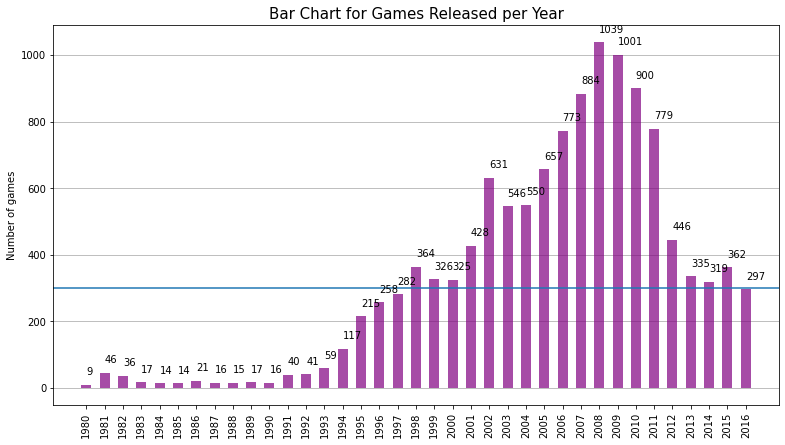

In [38]:
fig,ax=plt.subplots(figsize=(13,7))
ax.grid(axis='y')
ax.vlines(x=data_games_per_year.year_of_release, ymin=0, ymax=data_games_per_year.games, color='purple', alpha=0.7, linewidth=10)

ax.set_title("Bar Chart for Games Released per Year", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(data_games_per_year.year_of_release)
ax.set_xticklabels(data_games_per_year.year_of_release,rotation=90)
ax.axhline(y=300)

for row in data_games_per_year.itertuples():
    ax.text(row.year_of_release, row.games+30,s=row.games)
plt.show()

**Conclusions**   

Looking the graph above, we can conclude two things:
1. We can see that the game industry started growing significantly starting from 1995, therefore, the relevant period for the industry and games is 1994-2016
2. As per this research goal, in order to identify patterns that determine whether a game succeeds or not, as the gaming industry is fast developing and very dynamic, it's best to refer to games and platforms which has been relevant for the past 5 years or so: 2011-2016.

### Sales variation from platform to platform
#### Platforms with the greatest total sales

We will find platforms with the greatest total sales and build a distribution based on data for each year.

In [39]:
platforms_sales=data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
platforms_sales

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


**Conclusions:**   

It looks like PS2, X360, PS3, Wii, and DS are platforms with the greatest total sales.

**Z score** - to learn how far the total sales on each platform from the average total sales.

In [40]:
platforms_sales['sales_z']=(platforms_sales['total_sales']-platforms_sales['total_sales'].mean())/platforms_sales['total_sales'].std()
platforms_sales

,platform,total_sales,sales_z
0,PCFX,0.03,-0.825633
1,GG,0.04,-0.825604
2,3DO,0.10,-0.825431
3,TG16,0.16,-0.825257
4,WS,1.42,-0.821621
5,NG,1.44,-0.821563
6,SCD,1.86,-0.820351
7,DC,15.95,-0.779688
8,GEN,28.35,-0.743902
9,SAT,33.59,-0.728780


**Let's build a distribution to visualize the findings**

In [41]:
platforms_sales['color']=['red' if x<0 else 'green' for x in platforms_sales['sales_z']]
platforms_sales

,platform,total_sales,sales_z,color
0,PCFX,0.03,-0.825633,red
1,GG,0.04,-0.825604,red
2,3DO,0.10,-0.825431,red
3,TG16,0.16,-0.825257,red
4,WS,1.42,-0.821621,red
5,NG,1.44,-0.821563,red
6,SCD,1.86,-0.820351,red
7,DC,15.95,-0.779688,red
8,GEN,28.35,-0.743902,red
9,SAT,33.59,-0.728780,red


Text(0.5, 0, 'Z-score')

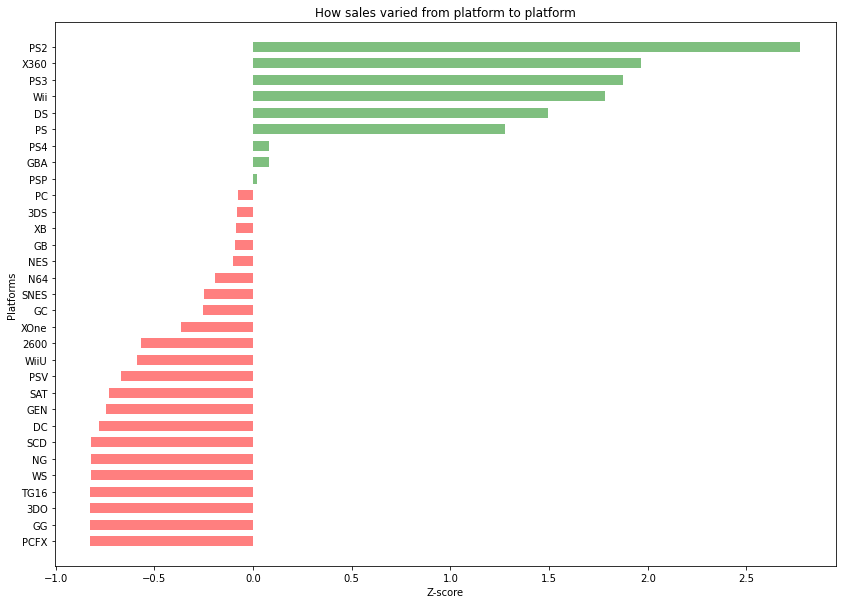

In [42]:
plt.figure(figsize=(14,10))
plt.hlines(y=platforms_sales.platform,xmax=platforms_sales.sales_z, xmin=0,color=platforms_sales.color, alpha=0.5, linewidth=10)
plt.title('How sales varied from platform to platform')
plt.ylabel('Platforms')
plt.xlabel('Z-score')

**Conclusions:**  

PS2, X360, PS3, Wii, and DS are high above the average in terms of total sales.

#### Platforms that used to be popular but now have zero sales.

Based on the conclusions from the data above, we will take data starting from 1995 and not before.

In [43]:
pop_platforms=data[data.year_of_release>=1995]
pop_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


We will calculate age of each platform to be able to see when the platforms emerge and how long it takes them to fade out.

In [44]:
platform_age=pop_platforms.groupby(['platform'])['year_of_release'].agg(['min','max'])

In [45]:
platform_age['age']=platform_age['max']-platform_age['min']

In [46]:
platform_age['age'].median()

6.0

The median age of the platform is 6 years.

In [47]:
platform_age=platform_age.reset_index()
platform_age.sort_values(by='min')

,platform,min,max,age
18,SAT,1995,1999,4
1,3DO,1995,1995,0
20,TG16,1995,1995,0
12,PS,1995,2003,8
5,GB,1995,2001,6
10,PC,1995,2016,21
9,NG,1995,1996,1
19,SNES,1995,1999,4
11,PCFX,1996,1996,0
8,N64,1996,2004,8


There are platforms which are very old, like PC (21 years), 3DS (16), PS2 (11 years), and platforms which are emerging, such as XOne, PS4 (3 years).

**Let's see on a graph how long it generally takes for new platforms to appear and old ones to fade**

Text(0.5, 0, 'Year of release')

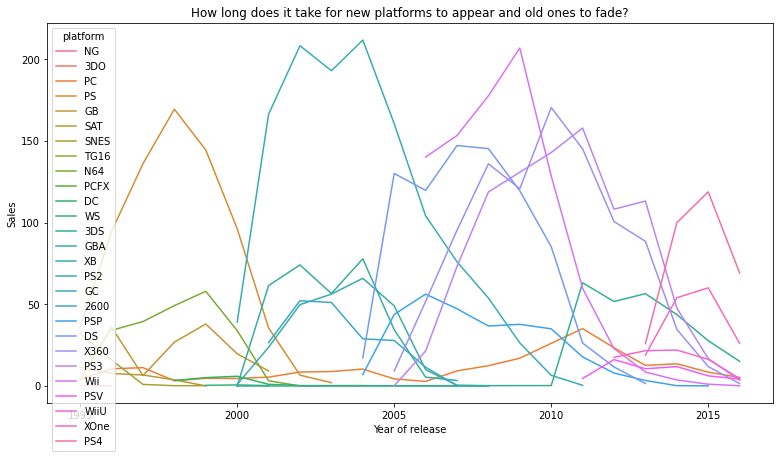

In [48]:
pop_platforms_age=pop_platforms.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(13,7))
ax = sns.lineplot(data=pop_platforms_age, x="year_of_release", y="total_sales",hue="platform")
plt.title('How long does it take for new platforms to appear and old ones to fade?')
plt.ylabel('Sales')
plt.xlabel('Year of release')

**Conclusions:**   

It looks like in the past, it took about 5-6 years for popularity of a platform. PS and PS2, which were very popular a few years ago, have zero sales today. Currently, it takes a platforms 3-4 years to be popular and then slowly fade away.
The emerging platforms are - XOne, PS4.

#### Data period

Based on the data above, the relevant period to build prognosis for 2017 is starting from 2012.

In [49]:
data_new=data[data.year_of_release>=2012]
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


#### Leading platforms

In [50]:
df=pd.pivot_table(data_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
df.tail()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.76,11.67,23.45,108.28,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


**Conclusions:**   

Based on the sales numbers, leading platforms starting from 2012 are XOne, WiiU, X360, 3DS, DS, PS, PS3, PC, PS4.

#### Selecting potentially profitable platforms

Let's see how the revenues of each platform changed from year to year.

In [51]:
df.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,51.76,11.67,23.45,108.28,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2014,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2015,43.76,0.00,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2016,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


In [52]:
df-df.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,4.81,-10.13,-10.79,4.97,25.99,-4.57,-5.60,-14.35,4.09,-12.14,18.96
2014,-12.81,-1.54,0.97,-65.49,74.01,-3.14,1.31,-4.84,0.38,-53.84,35.11
2015,-15.98,0.00,-5.11,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,0.00,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


In [53]:
dynamics=(df-df.shift(+1)).T
dynamics

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,NaN,4.81,-12.81,-15.98,-12.64
DS,NaN,-10.13,-1.54,0.00,0.00
PC,NaN,-10.79,0.97,-5.11,-3.27
PS3,NaN,4.97,-65.49,-30.94,-13.22
PS4,NaN,25.99,74.01,18.90,-49.65
PSP,NaN,-4.57,-3.14,-0.12,-0.12
PSV,NaN,-5.60,1.31,-5.65,-2.00
Wii,NaN,-14.35,-4.84,-2.61,-0.96
WiiU,NaN,4.09,0.38,-5.68,-11.75


We will build a heatmap to visualize the dynamics of the sales.

Text(0.5, 60.0, 'Year')

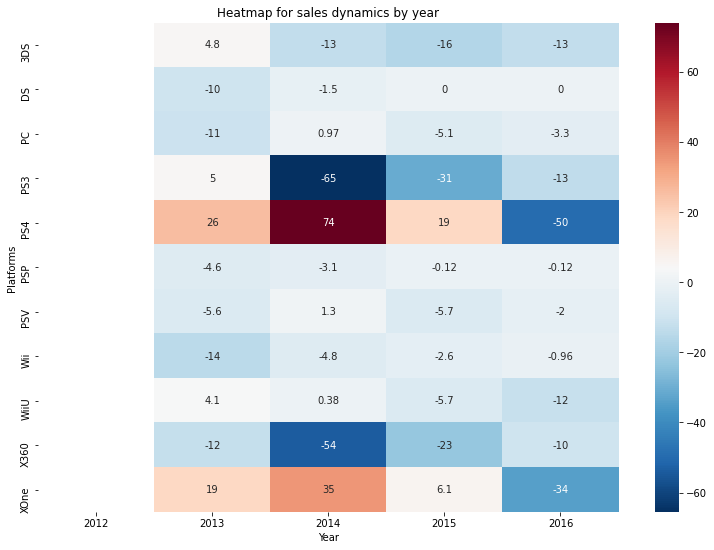

In [54]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics, cmap='RdBu_r', annot=True)
plt.title('Heatmap for sales dynamics by year')
plt.ylabel('Platforms')
plt.xlabel('Year')

**Conclusions:**   

**Growing platforms:**
PS4, XOne, WiiU (relatively)

**Shrinking platforms:**
X360, 3DS, DS, PS, PS3, PC

### Studying global sales for platforms

**Let's build a box plot for the global sales of each game, broken down by platform, and find out whether the differences in sales is significant.**

In [55]:
grouped=data_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
grouped

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
2893,XOne,XCOM 2,0.04
2894,XOne,ZombiU,0.01
2895,XOne,Zombie Army Trilogy,0.11
2896,XOne,Zoo Tycoon (2013),0.36


Text(0.5, 0, 'Platform')

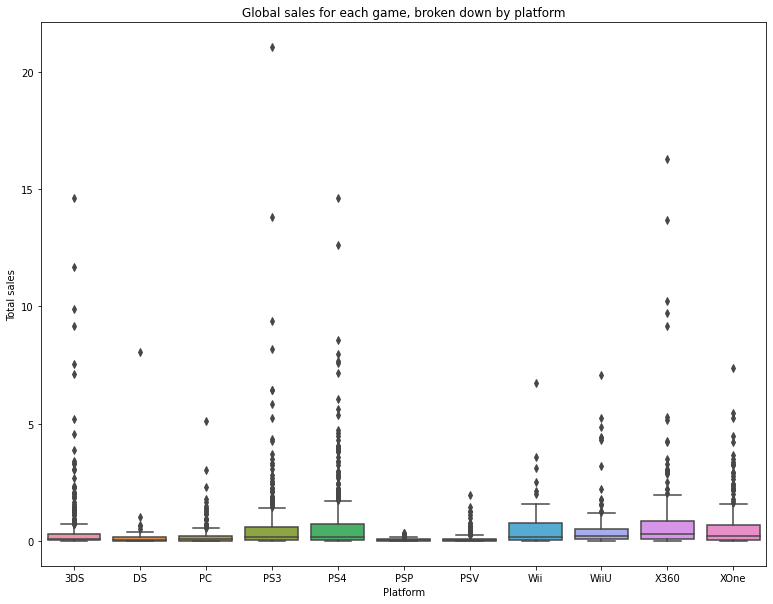

In [56]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped)
plt.title('Global sales for each game, broken down by platform')
plt.ylabel('Total sales')
plt.xlabel('Platform')

Let's exclude the outliers from the visualization.

Text(0.5, 0, 'Platform')

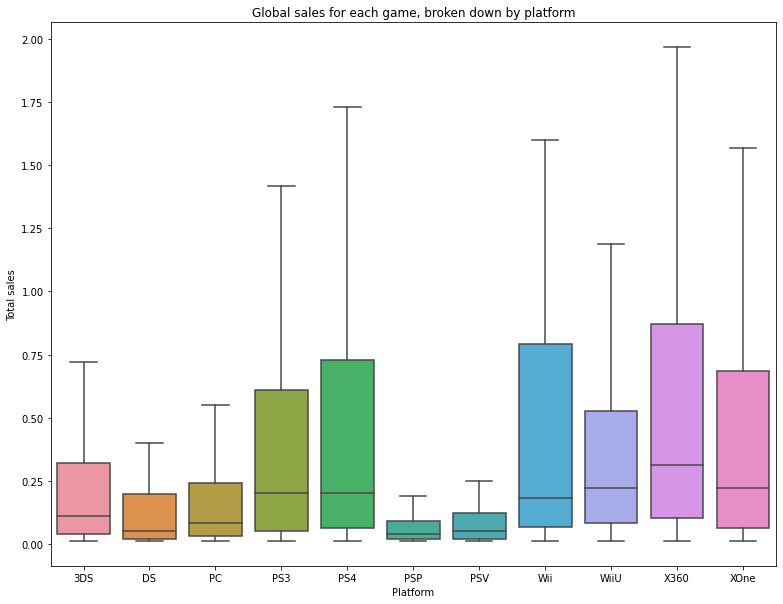

In [57]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped,showfliers = False)
plt.title('Global sales for each game, broken down by platform')
plt.ylabel('Total sales')
plt.xlabel('Platform')

Let's sort the platforms by total sales.

In [58]:
order=grouped.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
order

5      PSP
1       DS
7      Wii
6      PSV
2       PC
8     WiiU
10    XOne
0      3DS
9     X360
3      PS3
4      PS4
Name: platform, dtype: object

Text(0.5, 0, 'Platform')

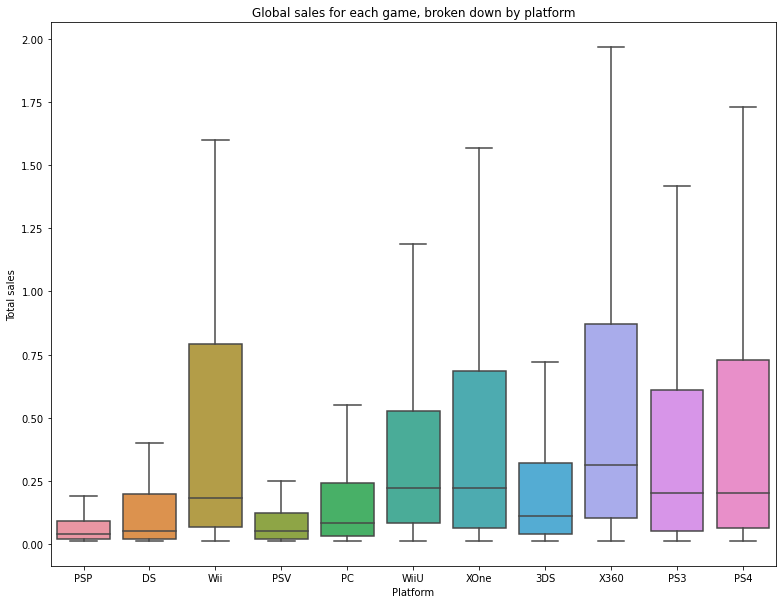

In [59]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped,order=order,showfliers = False)
plt.title('Global sales for each game, broken down by platform')
plt.ylabel('Total sales')
plt.xlabel('Platform')

**Conclusions:**
- The data on PSP and PSV platforms can be discarded, as the significance is low.
- The average sales on X360 are higher than on PS3, PS4, XOne, and WiiU platforms. 
- The total sales for X360 are the highest, right above PS4 platform. Wii and XOne go right after that.

### Reviews affect on sales

**Let's take a look at how user and professional reviews affect sales for a particular popular platform. We will build a scatter plot and calculate the correlation between reviews and sales.**

In [60]:
def score_effect(platform, score_type):
    """
    The function will calculate the correlation between two types of scores: 
    user score and critic score - and total sales on different platforms. 
    It will them build a scatter plot to visualize the correlation. It will also give an answer whether 
    there's a correlation between reviews and sales. 
    The correlation limit is set rather low (0.4 for positive and -0.5 for negative) 
    to determine at least slightest relations between the values. The logic is that the reviews would negatively or positively
    affect the sales, and the correlation could only be positive - the higher the score, the higher the sales, or - the 
    lower the score, the lower the sales. However, we wanted to cover all posible scenarios.
    """
    filtered=data_new[(data_new.platform==platform)&(data_new[score_type].notna())][['total_sales',score_type]]
    fig, ax = plt.subplots(figsize=(6,5))
    ax = sns.scatterplot(data=filtered, x='total_sales', y=score_type)
    plt.show()
    correlation=filtered[score_type].corr(filtered['total_sales'])
    if correlation>0.4:
        result='Correlation is positive between this score and sales'
    elif correlation<-0.5:
        result='Correlation is negative between this score and sales'
    else:
        result='Weak or no correlation between this score and sales'
    print(result)

In [61]:
platforms=['X360','PS4', 'XOne']
col=['critic_score', 'user_score']

X360 critic_score


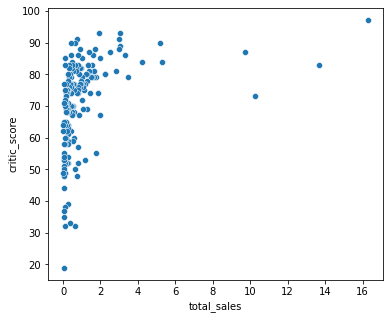

Weak or no correlation between this score and sales
X360 user_score


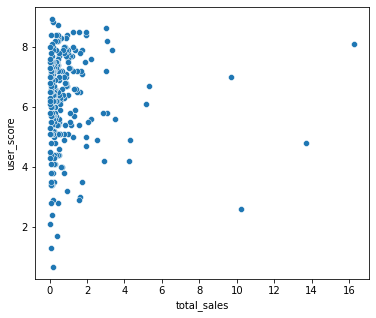

Weak or no correlation between this score and sales
PS4 critic_score


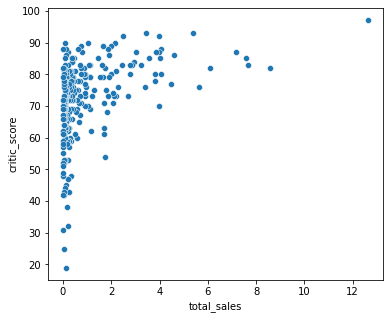

Correlation is positive between this score and sales
PS4 user_score


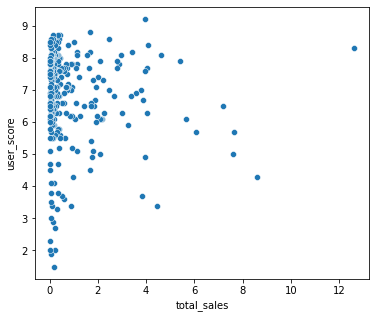

Weak or no correlation between this score and sales
XOne critic_score


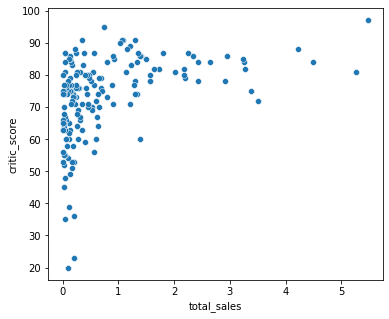

Correlation is positive between this score and sales
XOne user_score


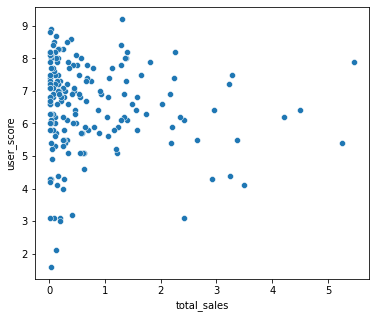

Weak or no correlation between this score and sales


In [62]:
future_df=[]
for i in platforms:
    for x in col:
        print(i,x)
        future_df.append([i,x,score_effect(i,x)])

**Conclusions:**   

**On X360**:   
- Weak or no correlation between critic_score and sales.   
- Weak or no correlation between user_score and sales.   

**ON PS4**:   
- Correlation is positive between critic_score and sales 
- Weak or no correlation between  user_score and sales.   

**On XOne**:   
- Correlation is positive between critic_score and sales  
- Weak or no correlation between user_score and sales

## Creating a user profile for each region

**For each region (NA, EU, JP), we will determine:**
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. 
- Do ESRB ratings affect sales in individual regions?

### Top 5 platforms

In [63]:
# NA platforms:
na=data_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,platform,na_sales
9,X360,140.57
4,PS4,108.74
3,PS3,103.74
10,XOne,93.12
0,3DS,55.49


In [64]:
na.value_counts()

platform  na_sales
3DS       55.49       1
PS3       103.74      1
PS4       108.74      1
X360      140.57      1
XOne      93.12       1
dtype: int64

In [65]:
#EU platforms
eu=data_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,platform,eu_sales
4,PS4,141.09
3,PS3,107.27
9,X360,74.89
10,XOne,51.59
0,3DS,42.83


In [66]:
eu.value_counts()

platform  eu_sales
3DS       42.83       1
PS3       107.27      1
PS4       141.09      1
X360      74.89       1
XOne      51.59       1
dtype: int64

In [67]:
#Japan platforms
jp=data_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


In [68]:
jp.value_counts()

platform  jp_sales
3DS       87.79       1
PS3       35.29       1
PS4       15.96       1
PSV       21.04       1
WiiU      13.01       1
dtype: int64

In [69]:
comb=na.merge(jp,how='outer',on=['platform'])
comb

,platform,na_sales,jp_sales
0,X360,140.57,NaN
1,PS4,108.74,15.96
2,PS3,103.74,35.29
3,XOne,93.12,NaN
4,3DS,55.49,87.79
5,PSV,NaN,21.04
6,WiiU,NaN,13.01


In [70]:
comb=comb.merge(eu,how='outer',on=['platform'])
comb

,platform,na_sales,jp_sales,eu_sales
0,X360,140.57,NaN,74.89
1,PS4,108.74,15.96,141.09
2,PS3,103.74,35.29,107.27
3,XOne,93.12,NaN,51.59
4,3DS,55.49,87.79,42.83
5,PSV,NaN,21.04,NaN
6,WiiU,NaN,13.01,NaN


**The top 5 platforms:**

**NA:**
- X360
- PS4
- PS3
- XOne
- 3DS

**EU:**
- PS4
- PS3
- 3DS
- PSV
- WiiU

**Japan:**
- X360
- PS4
- PS3
- XOne
- 3DS

#### Revenue and market share

In [71]:
all_rev=data_new.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index()
all_rev

,platform,na_sales,eu_sales,jp_sales
0,3DS,55.49,42.83,87.79
1,DS,4.93,3.78,3.72
2,PC,19.26,38.38,0.00
3,PS3,103.74,107.27,35.29
4,PS4,108.74,141.09,15.96
5,PSP,0.23,0.52,10.71
6,PSV,10.98,11.36,21.04
7,Wii,18.14,12.34,3.39
8,WiiU,38.10,25.13,13.01
9,X360,140.57,74.89,1.57


In [72]:
all_rev['na_sales%']=all_rev['na_sales']/all_rev['na_sales'].sum()
all_rev['eu_sales%']=all_rev['eu_sales']/all_rev['eu_sales'].sum()
all_rev['jp_sales%']=all_rev['jp_sales']/all_rev['jp_sales'].sum()
all_rev.sort_values(by='na_sales',ascending=False)

,platform,na_sales,eu_sales,jp_sales,na_sales%,eu_sales%,jp_sales%
9,X360,140.57,74.89,1.57,0.236929,0.147080,0.008142
4,PS4,108.74,141.09,15.96,0.183280,0.277093,0.082771
3,PS3,103.74,107.27,35.29,0.174853,0.210672,0.183020
10,XOne,93.12,51.59,0.34,0.156953,0.101320,0.001763
0,3DS,55.49,42.83,87.79,0.093528,0.084116,0.455295
8,WiiU,38.10,25.13,13.01,0.064217,0.049354,0.067472
2,PC,19.26,38.38,0.00,0.032462,0.075376,0.000000
7,Wii,18.14,12.34,3.39,0.030575,0.024235,0.017581
6,PSV,10.98,11.36,21.04,0.018507,0.022310,0.109117
1,DS,4.93,3.78,3.72,0.008309,0.007424,0.019293


**Variations in their market shares from region to region**

X360	- NA sales 27%, EU sales - 15%,	Japan Sales - 1%  
PS4	- NA sales - 18%, EU sales - 28%, Japan Sales - 8%   
PS3	- NA sales 17%, EU sales 21%, Japan sales 18%   
XOne - NA sales 16%, EU sales 10%, Japan sales - 0%   
3DS - NA sales 9%,	EU sales 8%, Japan sales 5%   
WiiU - NA sales - 6%, EU sales - 5%, Japan sales - 7%   
PSV - NA sales - 2%, EU sales - 2%,	Japan sales - 11%

#### Top 5 genres

In [73]:
na_genres=data_new.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_genres

,genre,na_sales
0,Action,180.15
8,Shooter,144.79
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [74]:
eu_genres=data_new.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_genres

,genre,eu_sales
0,Action,161.70
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


In [75]:
jp_genres=data_new.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_genres

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,13.10
9,Simulation,10.41
2,Fighting,9.44


Top 5 genres - NA:
1. Action
2. Shooter
3. Sports
4. Role_Playing
5. Misc 

Top 5 genres - EU:
1. Action
2. Shooter
3. Sports
4. Role_Playing
5. Racing

Top 5 genres - Japan:
1. Role_Playing
2. Action
3. Misc
4. Simulation
5. Fighting

#### ESRB ratings affect on sales in individual regions

Let's look at the rating meaning: 

- E - everyone   
- E10+ - everyone +10 years old   
- T - teens   
- M - mature +17

In [76]:
data_new['rating'] = data_new['rating'].fillna(value='Unknown')

In [77]:
all_rating=data_new.groupby(['rating'])['na_sales','eu_sales','jp_sales'].sum().reset_index()
all_rating

,rating,na_sales,eu_sales,jp_sales
0,E,114.37,113.03,28.33
1,E10+,77.93,57.25,8.19
2,M,231.67,194.44,21.20
3,T,66.02,52.96,26.02
4,Unknown,103.31,91.50,109.08


Text(0.5, 0, 'Sales in USD Millions')

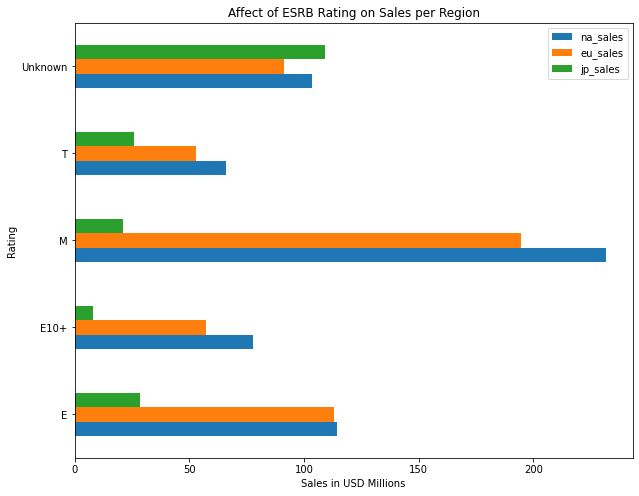

In [78]:
all_rating.plot.barh(x='rating', figsize=(10,8))
plt.title('Affect of ESRB Rating on Sales per Region')
plt.ylabel('Rating')
plt.xlabel('Sales in USD Millions')

In [79]:
all_rating['na_sales%']=all_rating['na_sales']/all_rating['na_sales'].sum()
all_rating['eu_sales%']=all_rating['eu_sales']/all_rating['eu_sales'].sum()
all_rating['jp_sales%']=all_rating['jp_sales']/all_rating['jp_sales'].sum()
all_rating.sort_values(by='na_sales',ascending=False)

,rating,na_sales,eu_sales,jp_sales,na_sales%,eu_sales%,jp_sales%
2,M,231.67,194.44,21.20,0.390477,0.381869,0.109947
0,E,114.37,113.03,28.33,0.192769,0.221984,0.146925
4,Unknown,103.31,91.50,109.08,0.174128,0.179701,0.565709
1,E10+,77.93,57.25,8.19,0.131350,0.112436,0.042475
3,T,66.02,52.96,26.02,0.111276,0.104010,0.134945


In [80]:
na_rating_sales=data_new.groupby(['rating'])['na_sales'].count()
na_rating_sales

rating
E           395
E10+        313
M           503
T           412
Unknown    1276
Name: na_sales, dtype: int64

In [81]:
na_mean_sales_rating=data_new.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales',ascending=False).head()
na_mean_sales_rating

,rating,na_sales
2,M,0.460577
0,E,0.289544
1,E10+,0.248978
3,T,0.160243
4,Unknown,0.080964


In [82]:
eu_mean_sales_rating=data_new.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_mean_sales_rating

,rating,eu_sales
2,M,0.386561
0,E,0.286152
1,E10+,0.182907
3,T,0.128544
4,Unknown,0.071708


In [83]:
jp_mean_sales_rating=data_new.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_mean_sales_rating

,rating,jp_sales
4,Unknown,0.085486
0,E,0.071722
3,T,0.063155
2,M,0.042147
1,E10+,0.026166


In [84]:
na_rating_sales_sum=data_new.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_rating_sales_sum

,rating,na_sales
2,M,231.67
0,E,114.37
4,Unknown,103.31
1,E10+,77.93
3,T,66.02


Text(0.5, 0, 'Sales in USD Millions')

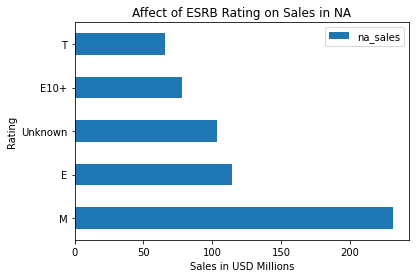

In [85]:
na_rating_sales_sum.plot.barh(x='rating')
plt.title('Affect of ESRB Rating on Sales in NA')
plt.ylabel('Rating')
plt.xlabel('Sales in USD Millions')

In [86]:
eu_rating_sales_sum=data_new.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_rating_sales_sum

,rating,eu_sales
2,M,194.44
0,E,113.03
4,Unknown,91.50
1,E10+,57.25
3,T,52.96


Text(0.5, 0, 'Sales in USD Millions')

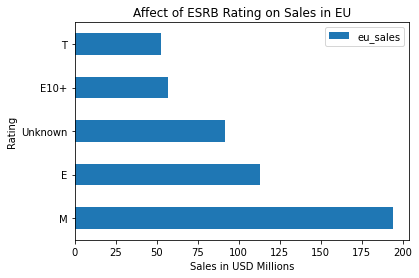

In [87]:
eu_rating_sales_sum.plot.barh(x='rating')
plt.title('Affect of ESRB Rating on Sales in EU')
plt.ylabel('Rating')
plt.xlabel('Sales in USD Millions')

In [88]:
jp_rating_sales_sum=data_new.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_rating_sales_sum

,rating,jp_sales
4,Unknown,109.08
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


Text(0.5, 0, 'Sales in USD Millions')

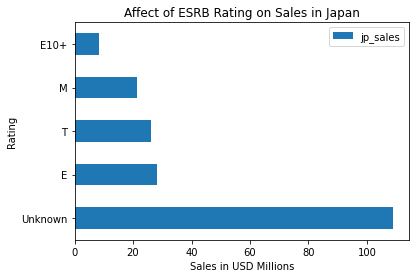

In [89]:
jp_rating_sales_sum.plot.barh(x='rating')
plt.title('Affect of ESRB Rating on Sales in Japan')
plt.ylabel('Rating')
plt.xlabel('Sales in USD Millions')

**Conclusions**  

- In NA and EU - the biggest sales are fore M-rated games. 
- M-rated games are 39% of NA game market. And 38% of the EU market.  
- E-rated games (suitable for small children under 10 years old) - are the second biggest sales for NA and EU areas.    
- E-rated games are 14% of a marken in Japan, and T rated games are not far behind. At markets NA and EU E-rated games are around 20%, and T-rated are about 10%.
- E+10 and T rated take about the same share of the market in NA and EU - around 11%.   
- Average sales of M-rated games in NA are about 0.5 mln USD. IN EU the T-rated games have average sales of about 0.4 mln USD.
- M-rated games have the biggest number of games. Rigt after that are E and T ratings.
- Games with unknown rating constitute 17% of sales in NA and EU, and 57% in Japan. 
- In fact, for majority of the games sold in Japan the rating is unknown. Therefore, we can't really drive any conclusions regarding the affect of rating in Japan. 

## Hypotheses testing
### Average user ratings of the Xbox One and PC platforms are the same.

In [90]:
data_new.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

*Let's statistically test the hypothesis that average user ratings of the Xbox One and PC platforms are the same.*

**Ho - null hypothesis:** Average user ratings of the Xbox One and PC platforms are the same.   

**H1 hypothesis:** Average user ratings of the Xbox One and PC platforms are not the same.


Since we have users from two different platforms, we need to compare the means of two different statistical populations. We will use two-tailed test as we test the hypothesis that the means of the two independent populations are equal. We will use the following method:scipy.stats.ttest_ind(array1, array2). equal_var = True - because we are not sure that the variance is not equal. The statistical significance value (alpha) will be set to 0.05.

In [91]:
xone=data_new[(data_new.platform=='XOne')&(data_new.user_score.notna())]['user_score'].astype(float)
xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [92]:
pc=data_new[(data_new.platform=='PC')&(data_new.user_score.notna())]['user_score'].astype(float)
pc

192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16463    6.8
16509    7.9
16518    1.4
16584    7.9
16692    7.6
Name: user_score, Length: 211, dtype: float64

We assumed that those are two different populations. Let's run a levene test to check whether the variance of these populations is equal.

In [93]:
stat, p = levene(xone, pc)
p<0.05

True

It seems that the samples are taken from populations with similar parameters, therefore, we will set the equal_var to True.

In [94]:
def t_test(xone,pc,alpha=0.05):
    p_value=stats.ttest_ind(xone, pc).pvalue
    if p_value<alpha:
        print('Reject H0: Average user ratings of the Xbox One and PC platforms are not the same.')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that average user ratings of the Xbox One and PC platforms are not the same.")

In [95]:
t_test(xone,pc,alpha=0.05)

Fail to Reject H0: We don't have enough evidence to say that average user ratings of the Xbox One and PC platforms are not the same.


### Average user ratings for the Action and Sports genres are different.

*Let's test a hypothesis that average user ratings for the Action and Sports genres are dufferent.*

**Ho - null hypothesis:** Average user ratings for the Action and Sports genres are the same.   

**H1 hypothesis:** Average user ratings for the Action and Sports genres are different.   

We have user ratings for Action and Sports genres, we need to compare the means of two different statistical populations.
We will use two-tailed test as we test the hypothesis that the means of the two independent populations are equal. We will use the following method:scipy.stats.ttest_ind(array1, array2, equal_var). equal_var=True - because we are not sure that the variance is not equal.
The statistical significance value (alpha) will be set to 0.05.

In [96]:
data_new.genre.unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [97]:
action=data_new[(data_new.genre=='Action')&(data_new.user_score.notna())]['user_score'].astype(float)
action

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 531, dtype: float64

In [98]:
sports=data_new[(data_new.genre=='Sports')&(data_new.user_score.notna())]['user_score'].astype(float)
sports

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16146    6.9
16230    5.5
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 195, dtype: float64

In [99]:
stat, p = levene(sports, action)
p<0.05

True

It seems that the samples are taken from populations with similar parameters, therefore, we will set the equal_var to True.

In [100]:
def t_test(action, sports,alpha=0.05):
    p_value=stats.ttest_ind(action, sports).pvalue
    if p_value<alpha:
        print('Reject H0: Average user ratings for the Action and Sports genres are different.')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that average user ratings for the Action and Sports genres are different.")

In [101]:
t_test(action,sports,alpha=0.05)

Reject H0: Average user ratings for the Action and Sports genres are different.


## General Conclusions

The purpose of the project was to identify patterns that determine whether a game succeeds or not. My hypothesis is that reviews and game platform all can predict a success of a game.
We did the following:   

1.	Sampled the data and got a primary information about the data.
2.	Examined the data
A.	Missing values, if any.
B.	Examined wrong data types and treatede them.
3.	Treated the missing values.
4.	Explored the data and drove conclusions.
5.	Conducted statistical data analysis, visualized the data, and drove conclusions.
6.	Conducted a hypotheses check.   

**1. Data Description:**  

  **a.	Missing values**

   There're missing values in following column:
1.	critic_score - about 51% of the data
2.	rating - about 40% of the data
3.	user_score - about 40% of the data
4.	year_of_release - about 2% of the data
5.	name and genre - a small % of the data   

 **b.	wrong data types**
-	user_score column was an object type

These missing values were investigated and addressed. As we saw from the data and the project description, the data is an open source and at least part of it must have been manually compiled from different sources. Some data has been left out and couldn't be found by those inserting the data in the database. In such case, it's difficult to predict of restore the data. We tried to restore at least some of it.

**2. Data fixes and enrichments:**    

   - Two rows of the data hadmissing values in name and genre columns. There's no way we could estimate or predict those values, and the amount of data is rather small, therefore, we safely removed those rows.
   - As we see from the data above, one of the values in user_score column is 'tbd'. We replaced the 'tbd' values in user_score column with NaN, as 'tbd' in this case was similar to missing values. There's no way we could estimate or predict user score, therefore, we will leave the NaN values as they are.
   - We changeed the data type of the user_score column from object to float to be able to make calculations with it later.
   - We’ve addressed the missing values in the year_of_release, critic_score, and rating columns:
   
     1. The values for the year_of_release appeard on various platforms. We tried to restore the missing values using dictionary by finding the most common values for each name of the game for the release year. Only part of the data could be restored, because some games weren’t found on other platforms or the release year was missing completely. 
     2. We dropped the remaining data with missing values in name and year_of_release_columns.
     3. The missing values have been left as they are in columns:
     
     •	critic_score   
     •	user_score   
     •	rating
     
     Replacing missing values in the above column, even bases on value for the same game name on other platforms, wouldn’t have changed a lot and would have beed an hard stretched estimate. Many missing values would still be left in those columns, therefore, we left those as they are, and will filtered them out later, once we needed those columns for calculations.

**3. Studying the data**   

   **3.1 General sales data on planforms and games popularity**

   **The most popular platforms with the biggest number of games sales are:**
   •	PS2
   •	DS
   •	PS3
   •	Wii
   •	X360

   **Games with largest sales - Top5:**   
   NA - Wii Sports, Super Mario Bros., Duck Hunt, Tetris, Mario Karl Wii   
   EU - Wii Sports, Mario Karl Wii, Nintendogs, Wii Sports Resort, Brain Age: Train Your Brain in Minutes a Day    
   Japan - Pokemon Red/Pokemon Blue, Pokemon Gold/Pokemon Silver, Super Mario Bros., New Super Mario Bros., Pokemon Diamond/Pokemon Pearl


   **We’ve calculated total sales for each region for each game**

**4. Analyzing the data**  
 
  **4.1 Games released in different years**

   **Significance of the data**   
   
   Looking at the graph, we can conclude two things:
    1. The game industry started growing significantly starting from 1994, therefore, the relevant period for the industry and games is 1994-2016.
    2. As per this research goal, in order to identify patterns that determine whether a game succeeds or not, as the gaming industry is fast developing and very dynamic, for the analysis we we’ve refer to games and planforms which has been relevant for the past 5 years: 2011-2016.   

  **4.2 Sales variation from platform to platform**   

   **4.2.1 Platforms with the greatest total sales**   

   **We have found platforms with the greatest total sales and built a distribution based on data for each year.**

   1.	PS2, X360, PS3, Wii, and DS were platforms with the greatest total sales.
   2.	We used a Z score to check how far the total sales on each platform were from the average total sales.
   3.	PS2, X360, PS3, Wii, and DS were high above the average in terms of total sales.   

   **4.2.2 Platforms that used to be popular but now have zero sales.**

   -	Based on the conclusions from the data above, to the analysis we took data starting from 1995.
   -	We calculateed age of each platform to be able to see when the platforms emerged and how long it took them to fade out.
   -	The median age of the platform was 6 years.
   -	There were old platforms, like PC (21 years), PS2 (11 years), and platforms which are emerging, such as XOne, PS4 (3 years).
   -	On the graph we saw how long it generally took for new platforms to appear and old ones to fade. 
   -	In the past, it took about 5-6 years for popularity of a platform. PS and PS2, which were very popular a few years ago, have zero sales today. Currently, it takes a platforms 3-4 years to be popular and then slowly fade away. The emerging platforms are - XOne, PS4.
   -	Based on the data, the relevant period to build prognosis for 2017 was starting from 2012.  


   **4.2.3 Leading platforms**

  - Based on the sales numbers, leading platforms starting from 2012 were XOne, WiiU, X360, 3DS, DS, PS, PS3, PC, PS4.  

    **4.3 Selecting potentially profitable platforms**  

     We built heatmap to visualize the dynamics of the sales of each platform changed from year to year:  

   **Growing platforms:** PS4, XOne, WiiU (relatively)   
   
   **Shrinking platforms:** X360, 3DS, DS, PS, PS3, PC

  
  **4.3.1 Studying global sales for platforms**   

   We built a box plot for the global sales of each game, broken down by platform.
   We’ve excluded the outliers from the visualization.
   •	The data on PSP and PSV platforms could be discarded, as their significance was low.
   •	The average sales on X360 were higher than on PS3, PS4, XOne, and WiiU platforms.
   •	The total sales for X360 are the highest, right above PS4 platform. Wii and XOne go right after that.

**5. Reviews affect on sales**   

   We looked at how user and professional reviews affected sales for a particular popular platform. For that we have built a scatter plot and calculated the correlation between reviews and sales.

  **The Conclusions:**   
  
  **On X360**:   
- Weak or no correlation between critic_score and sales.   
- Weak or no correlation between user_score and sales.   

 **ON PS4**:   
- Correlation is positive between critic_score and sales 
- Weak or no correlation between  user_score and sales.   

 **On XOne**:   
- Correlation is positive between critic_score and sales  
- Weak or no correlation between user_score and sales

**6. Creating a user profile for each region**  

For each region (NA, EU, JP), we determined:   

**1. The top five platforms**   

   **NA:**
    •	X360
    •	PS4
    •	PS3
    •	XOne
    •	3DS   
    
   **EU:**
   •	PS4
   •	PS3
   •	3DS
   •	PSV
   •	WiiU   
   
   **Japan:**
   •	X360
   •	PS4
   •	PS3
   •	XOne
   •	3DS

   **Variations in their market shares from region to region**

   •	X360	- NA sales 27%, EU sales - 15%,	Japan Sales - 1%  
   •	PS4	- NA sales - 18%, EU sales - 28%, Japan Sales - 8%   
   •	PS3	- NA sales 17%, EU sales 21%, Japan sales 18%   
   •	XOne - NA sales 16%, EU sales 10%, Japan sales - 0%   
   •	3DS - NA sales 9%,	EU sales 8%, Japan sales 5%   
   •	WiiU - NA sales - 6%, EU sales - 5%, Japan sales - 7%   
   •	PSV - NA sales - 2%, EU sales - 2%,	Japan sales - 11%

  **2. The top five genres for each region**   
  
  **NA:**
    1.	Action
    2.	Shooter
    3.	Sports
    4.	Role_Playing
    5.	Misc   
    
   **EU:**
    1.	Action
    2.	Shooter
    3.	Sports
    4.	Role_Playing
    5.	Racing   
    
   **Japan:**
    1.	Role_Playing
    2.	Action
    3.	Misc
    4.	Simulation
    5.	Fighting


   **3. ESRB ratings affect on sales in individual regions**
     
   **Conclusions**  

  - In NA and EU - the biggest sales are fore M-rated games. 
  - M-rated games are 39% of NA game market. And 38% of the EU market.  
  - E-rated games (suitable for small children under 10 years old) - are the second biggest sales for NA and EU areas.    
  - E-rated games are 14% of a marken in Japan, and T rated games are not far behind. At markets NA and EU E-rated games are around 20%, and T-rated are about 10%.
  - E+10 and T rated take about the same share of the market in NA and EU - around 11%.   
  - Average sales of M-rated games in NA are about 0.5 mln USD. IN EU the T-rated games have average sales of about 0.4 mln USD.
  - M-rated games have the biggest number of games. Rigt after that are E and T ratings.
  - Games with unknown rating constitute 17% of sales in NA and EU, and 57% in Japan. 
  - In fact, for majority of the games sold in Japan the rating is unknown. Therefore, we can't really drive any conclusions regarding the affect of rating in Japan. 
   
   Overall, NA market and EU market prefer and spend the most money on M-rated games. This means that the typical users of the games are audience +17 years old.


**7. Testing statistical hypotheses**  

   **7.1 We’ve tested the hypothesis that average user ratings of the Xbox One and PC platforms are the same.**    

   **Ho - null hypothesis:** Average user ratings of the Xbox One and PC platforms are the same.   

   **H1 hypothesis:** Average user ratings of the Xbox One and PC platforms are not the same. 
    Since we have users from two different platforms, we needed to compare the means of two different statistical populations. We used two-sided test as we tested the hypothesis that the means of the two independent populations were equal. We have used the following method:scipy.stats.ttest_ind(array1, array2). equal_var = True – based in levene test the samples were taken from populations with similar parameters, therefore, we will set the equal_var to True. The statistical significance value (alpha) was set to 0.05.

   **Test Result**   
   
   Fail to Reject H0: We don't have enough evidence to say that average user ratings of the Xbox One and PC platforms are not the same.   
   
   **7.2. We’ve tested the hypothesis that average user ratings for the Action and Sports genres are different.**  

   **Ho - null hypothesis:** Average user ratings for the Action and Sports genres are the same.   

   **H1 hypothesis:** Average user ratings for the Action and Sports genres are different.
   Since we have user ratings for Action and Sports genres, we need to compare the means of two different statistical populations. We will use two-tailed test as we test the hypothesis that the means of the two independent populations are equal. We will use the following method:scipy.stats.ttest_ind(array1, array2, equal_var). equal_var=True - because based in the levene test result, the samples were taken from populations with similar parameters, therefore, we will set the equal_var to True.
The statistical significance value (alpha) was set to 0.05.

  **Test Result**   
  
  Reject H0: Average user ratings for the Action and Sports genres are different.

**8.The bottom line:**   

It looks like the X360, PS4, Wii, XOne are the most profitable platforms, with PS4 and XOne being growing platforms at the moment. 
PS4 and X360 are in top 5 platforms in NA, EU, and Japan, with significant market shares in these regions. 

   In general, both user score and critic score have either weak or no affect on the sales. Only critics score was found to have some positive affect on PS4 and XOne platforms. 
Basically, the best prediction of success for games is the platforms’ global sales, as well as regional sales. It’s reasonable to select games with higher critics score to ensure their success. User score has weak or no affect on sales.   
   Additionally, it seems that M-rated and T-rated games will be most popular and most profitable for NA and EU markets.